In [133]:
import numpy as np
import pandas as pd
import random
import os
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy.stats import gaussian_kde

# Task 1
### Question 1

In [4]:
X = pd.read_csv('../Project1/KV_periodic/X.csv')
Y = pd.read_csv('../Project1/KV_periodic/Y.csv')
print("The shape of X.csv is:")
print(X.shape)
print("The shape of Y.csv is:")
print(Y.shape)

The shape of X.csv is:
(28962, 1752)
The shape of Y.csv is:
(28962, 3)


<font color=blue size=3> Since X and Y both has a column for timestamp, therefore, the number of samples is 28962, the number of features is 1751, the number of types of targets is 2. </font>

In [5]:
chosenFeatureID = random.sample(range(1752), 10) #choose 10 random featrues from 1751 features
print("The chosen features are:")
#print(chosenFeatureID)
chosenX = X.iloc[:, chosenFeatureID].copy() #the chosen features
for col in chosenX.columns:
    print(col)

The chosen features are:
4_cpu15_.usr
1_cpu6_.usr
0_cpu3_.sys
3_eth0_rxkB.s
3_cpu0_.iowait
2_cpu17_.sys
1_cpu10_.idle
3_retrans.s_2
2_cpu0_.idle
3_eth1_txkB.s


<font color=blue size=3> By looking up the manual page:</font> <br>
<font color=blue size=3> 'usr' means the percentage of CPU utilization that occurred while executing at the user level (application). </font> <br>
<font color=blue size=3> 'sys' means the percentage of CPU utilization that occurred while executing at the system level (kernel).</font> <br>
<font color=blue size=3> 'rxkB' means the total number of kilobytes received per second.</font> <br>
<font color=blue size=3> 'iowait' means the percentage of time that the CPU or CPUs were idle during which the system had an outstanding disk I/O request.</font> <br>
<font color=blue size=3> 'idle' means the percentage of time that the CPU or CPUs were idle and the system did not have an outstanding disk I/O request. </font> <br>
<font color=blue size=3> 'retrans' means the number of RPC requests per second, those which needed to be retransmitted. </font> <br>
<font color=blue size=3> 'txkB' means the total number of kilobytes transmitted per second.</font> <br>

In [6]:
pd.options.display.float_format = "{:,.2f}".format #set no more than two digits after the decimal point
allStatistics = pd.DataFrame(chosenX.describe(percentiles = [0.25,0.90]))
statistics  = allStatistics.iloc[[1,2,7,3,4,6], :].copy()
statistics

,4_cpu15_.usr,1_cpu6_.usr,0_cpu3_.sys,3_eth0_rxkB.s,3_cpu0_.iowait,2_cpu17_.sys,1_cpu10_.idle,3_retrans.s_2,2_cpu0_.idle,3_eth1_txkB.s
mean,0.15,0.54,0.35,0.12,0.59,0.44,98.55,0.66,97.85,492.29
std,0.61,0.93,0.64,0.08,1.49,0.95,1.73,6.30,2.59,182.65
max,16.00,27.45,4.00,0.76,48.98,55.00,100.00,306.00,101.01,"1,442.63"
min,0.00,0.00,0.00,0.00,0.00,0.00,26.00,0.00,31.00,18.21
25%,0.00,0.00,0.00,0.06,0.00,0.00,97.98,0.00,97.03,345.78
90%,0.99,1.02,1.01,0.24,2.97,1.02,100.00,0.00,100.00,731.76


<font color=blue size=3> With help of describe(), the required statistics are shown above.</font> <br>

### Question 2

In [7]:
#statisticsNum = np.around(statisticsNum, decimals=2) #round to two digits after the decimal point
numpyX = X.drop(['TimeStamp'], axis=1).copy() #remove timestamp
numpyX = numpyX.to_numpy()
#np.set_printoptions(precision=2) #set no more than two digits after the decimal point
numpyX

array([[2.230000e+00, 5.500000e-01, 4.200000e-01, ..., 2.960000e+02,
        1.216590e+05, 2.937120e+05],
       [3.480000e+00, 7.600000e-01, 1.510000e+00, ..., 3.487000e+03,
        1.603670e+06, 2.822663e+06],
       [5.400000e+00, 7.900000e-01, 5.360000e+00, ..., 2.755000e+03,
        1.272053e+06, 2.442247e+06],
       ...,
       [4.000000e-02, 8.000000e-02, 0.000000e+00, ..., 3.210000e+02,
        1.565630e+05, 2.891050e+05],
       [4.000000e-02, 8.000000e-02, 0.000000e+00, ..., 3.100000e+02,
        1.479080e+05, 2.842120e+05],
       [4.000000e-02, 4.000000e-02, 0.000000e+00, ..., 3.330000e+02,
        1.724420e+05, 2.755180e+05]])

##### (a) L2 Normalization

In [8]:
normedRowX= preprocessing.normalize(numpyX, norm='l2')
normedRowX

array([[7.69676654e-09, 1.89830565e-09, 1.44961522e-09, ...,
        1.02163359e-06, 4.19901758e-04, 1.01373663e-03],
       [1.19873115e-08, 2.61791861e-09, 5.20139093e-09, ...,
        1.20114240e-05, 5.52404940e-03, 9.72302896e-03],
       [1.86083603e-08, 2.72233419e-09, 1.84705206e-08, ...,
        9.49370974e-06, 4.38348528e-03, 8.41596520e-03],
       ...,
       [1.38095228e-10, 2.76190456e-10, 0.00000000e+00, ...,
        1.10821421e-06, 5.40515080e-04, 9.98100523e-04],
       [1.38095536e-10, 2.76191072e-10, 0.00000000e+00, ...,
        1.07024041e-06, 5.10635864e-04, 9.81210213e-04],
       [1.38094431e-10, 1.38094431e-10, 0.00000000e+00, ...,
        1.14963614e-06, 5.95331995e-04, 9.51187534e-04]])

In [9]:
#Verifycation of L2 norm
normCorrect = 1
for i in range(normedRowX.shape[0]):
    sums = 0
    for j in normedRowX[i]:
        sums += j**2
    sums = float("{:.4f}".format(sums))     
    if sums != 1:
        normCorrect = 0
if normCorrect:
    print("L2 norm in row is correct.")

L2 norm in row is correct.


In [10]:
normedColumnX = preprocessing.normalize(numpyX.T, norm='l2')
normedColumnX = normedColumnX.T
normedColumnX

array([[0.0210194 , 0.00907754, 0.00944102, ..., 0.00046718, 0.00039578,
        0.00050488],
       [0.03280157, 0.0125435 , 0.03394272, ..., 0.00550362, 0.00521708,
        0.00485209],
       [0.050899  , 0.01303864, 0.12048541, ..., 0.00434829, 0.00413826,
        0.00419817],
       ...,
       [0.00037703, 0.00132037, 0.        , ..., 0.00050664, 0.00050933,
        0.00049697],
       [0.00037703, 0.00132037, 0.        , ..., 0.00048928, 0.00048118,
        0.00048855],
       [0.00037703, 0.00066018, 0.        , ..., 0.00052558, 0.00056099,
        0.00047361]])

In [11]:
#Verifycation of L2 norm
normCorrect = 1
for j in range(normedColumnX.shape[1]):
    sums = 0
    for i in range(normedColumnX.shape[0]):
        sums += normedColumnX[i][j]**2
    sums = float("{:.4f}".format(sums))   
    if sums != 1:
        normCorrect = 0
if normCorrect:
    print("L2 norm in column is correct.")

L2 norm in column is correct.


##### (b) Restriction to Interval

In [12]:
def normalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [13]:
resRowX = np.zeros(numpyX.shape)
for i in range(numpyX.shape[0]):
    resRowX[i] = normalizeData(numpyX[i])
resRowX

array([[5.84383254e-05, 5.84132563e-05, 5.84113164e-05, ...,
        6.28219869e-05, 1.87381125e-03, 4.44120111e-03],
       [6.58279802e-05, 6.57873925e-05, 6.57985839e-05, ...,
        1.17808967e-04, 2.39956946e-02, 4.21854738e-02],
       [9.93530577e-05, 9.92842697e-05, 9.93524608e-05, ...,
        1.40381108e-04, 1.90801620e-02, 3.65411665e-02],
       ...,
       [4.48981704e-07, 4.49579549e-07, 4.48383859e-07, ...,
        5.24609115e-06, 2.34045912e-03, 4.32144890e-03],
       [9.57149591e-07, 9.57747435e-07, 9.56551746e-07, ...,
        5.58984926e-06, 2.21160742e-03, 4.24882350e-03],
       [8.37580672e-07, 8.37580672e-07, 8.36982828e-07, ...,
        5.81404143e-06, 2.57817614e-03, 4.11876260e-03]])

In [14]:
#Verifycation of [0,1] scaling
resCorrect = 1
for i in range(resRowX.shape[0]):
    for j in resRowX[i]:   
        if j<0 or j>1:
            resCorrect = 0
if resCorrect:
    print("[0,1] scaling in row is correct.")

[0,1] scaling in row is correct.


In [15]:
resColumnX = np.zeros(numpyX.T.shape)
for i in range(numpyX.T.shape[0]):
    resColumnX[i] = normalizeData(numpyX.T[i])
resColumnX = resColumnX.T
resColumnX

array([[0.11506708, 0.18272425, 0.0320122 , ..., 0.00775097, 0.01653088,
        0.00782261],
       [0.17956656, 0.25249169, 0.11509146, ..., 0.40667583, 0.39170616,
        0.35135498],
       [0.27863777, 0.26245847, 0.40853659, ..., 0.3151644 , 0.30775637,
        0.29967932],
       ...,
       [0.00206398, 0.02657807, 0.        , ..., 0.01087636, 0.02536693,
        0.0071968 ],
       [0.00206398, 0.02657807, 0.        , ..., 0.00950119, 0.02317589,
        0.00653213],
       [0.00206398, 0.01328904, 0.        , ..., 0.01237655, 0.02938674,
        0.00535114]])

In [16]:
#Verifycation of [0,1] scaling
resCorrect = 1
for i in range(resRowX.shape[0]):
    for j in resRowX[i]:   
        if j<0 or j>1:
            resCorrect = 0
if resCorrect:
    print("[0,1] scaling in column is correct.")

[0,1] scaling in column is correct.


##### (c) Standardization

In [17]:
stdRowX = np.zeros(numpyX.shape)
for i in range(numpyX.shape[0]):
    stdRowX[i] = preprocessing.scale(numpyX[i])
stdRowX

array([[-0.14757565, -0.14757589, -0.14757591, ..., -0.14753276,
        -0.1298149 , -0.10469678],
       [-0.15495775, -0.15495815, -0.15495804, ..., -0.15444964,
         0.07895409,  0.25675721],
       [-0.1533002 , -0.15330087, -0.15330021, ..., -0.15289908,
         0.0322686 ,  0.2029788 ],
       ...,
       [-0.14485998, -0.14485997, -0.14485998, ..., -0.14481312,
        -0.12200608, -0.10265858],
       [-0.144821  , -0.144821  , -0.14482101, ..., -0.14477576,
        -0.12323057, -0.10333399],
       [-0.14486899, -0.14486899, -0.144869  , ..., -0.14482039,
        -0.1196973 , -0.1046511 ]])

In [18]:
#Verifycation of standardizatio
stdCorrect = 1
for i in stdRowX:
    mean = float("{:.4f}".format(i.mean()))
    std = float("{:.4f}".format(i.std()))
    if mean != 0 or std != 1:
        stdCorrect = 0
if stdCorrect:
    print("L2 standardizatio in row is correct.")

L2 standardizatio in row is correct.


In [19]:
stdColumnX = np.zeros(numpyX.T.shape)
for i in range(numpyX.T.shape[0]):
    stdColumnX[i] = preprocessing.scale(numpyX.T[i])
stdColumnX = stdColumnX.T
stdColumnX

array([[ 3.68670472,  1.83315127,  1.33082725, ..., -1.56242283,
        -1.55914158, -1.4338984 ],
       [ 6.15623665,  3.63558832,  5.82039329, ...,  0.14334655,
         0.05312454, -0.04070709],
       [ 9.9494377 ,  3.89307932, 21.6780348 , ..., -0.24794872,
        -0.30763854, -0.25027709],
       ...,
       [-0.63991522, -2.20087449, -0.39909728, ..., -1.54905893,
        -1.52116984, -1.43643639],
       [-0.63991522, -2.20087449, -0.39909728, ..., -1.55493905,
        -1.53058553, -1.43913192],
       [-0.63991522, -2.54419583, -0.39909728, ..., -1.54264425,
        -1.50389522, -1.44392142]])

In [20]:
#Verifycation of standardizatio
stdCorrect = 1
for i in stdColumnX.T:
    mean = float("{:.4f}".format(i.mean()))
    std = float("{:.4f}".format(i.std()))
    if mean != 0 or std != 1:
        stdCorrect = 0
if stdCorrect:
    print("L2 standardizatio in column is correct.")

L2 standardizatio in column is correct.


# Task 2
### Question 2.1

In [21]:
# prepare train data
numpyY = Y.drop(['TimeStamp'], axis=1).copy().to_numpy() #remove timestamp
trainX, testX, trainY, testY = train_test_split(numpyX, numpyY, train_size = 0.7, shuffle = True) #split the train and test data

/home/wenqi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [22]:
def calError(real, pred):
    errors = np.zeros([1,2])
    m = pred.T.shape[1]
    for i in range(pred.T.shape[0]):
        average = real.T[i].mean()
        sums = 0
        for j in range(m):
            sums += abs(real.T[i][j] - pred.T[i][j])
        errors[0][i] = sums / m / average
    return errors

##### Linear regression

In [23]:
regLinear = LinearRegression()
regLinear.fit(trainX, trainY) #train model
predLinearY = regLinear.predict(testX) #predict Y

<font color=blue size=3> Linear regression's accuracy is:</font> <br>

In [24]:
calError(testY, predLinearY)

array([[2896859.71493346, 2716549.91643653]])

##### Random forest regression

In [25]:
regRF = RandomForestRegressor(n_estimators = 100, criterion = 'mse')
regRF.fit(trainX, trainY) #train model
predRFY = regRF.predict(testX) #predict Y

/home/wenqi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<font color=blue size=3> Random forest regression's accuracy is:</font> <br>

In [26]:
calError(testY, predRFY)

array([[0.0224254 , 0.02411191]])

#####  Neural network regression

In [75]:
regNN = MLPRegressor(hidden_layer_sizes = [128, 64, 32], random_state=1, max_iter=500, activation = 'logistic', solver = 'adam', early_stopping = True)
regNN.fit(trainX, trainY)
predNNY = regNN.predict(testX) #predict Y

<font color=blue size=3> Neural network's accuracy is:</font> <br>

In [76]:
calError(testY, predNNY)

array([[0.04374399, 0.04635182]])

##### Naive method 

In [29]:
predNaiveY = np.zeros(testY.shape)
predNaiveY.T[0].fill(trainY.T[0].mean())
predNaiveY.T[1].fill(trainY.T[1].mean())
predNaiveY

array([[ 55.97945923, 111.94876782],
       [ 55.97945923, 111.94876782],
       [ 55.97945923, 111.94876782],
       ...,
       [ 55.97945923, 111.94876782],
       [ 55.97945923, 111.94876782],
       [ 55.97945923, 111.94876782]])

<font color=blue size=3> Naive method 's accuracy is:</font> <br>

In [30]:
calError(testY, predNaiveY)

array([[0.04370607, 0.04635529]])

##### For random forest model

In [96]:
newX = X.drop(['TimeStamp'], axis=1).head(600).copy() #select plot datas
newY = Y.drop(['TimeStamp'], axis=1).head(600).copy()
timeStamp = np.arange(600)
newNumpyX =newX.to_numpy()
newNumpyY =newY.to_numpy()

In [99]:
newPredNNY = regRF.predict(newNumpyX)
newPredNaiveY = predNaiveY[0:600, :]

##### Plot of Key Value 1 

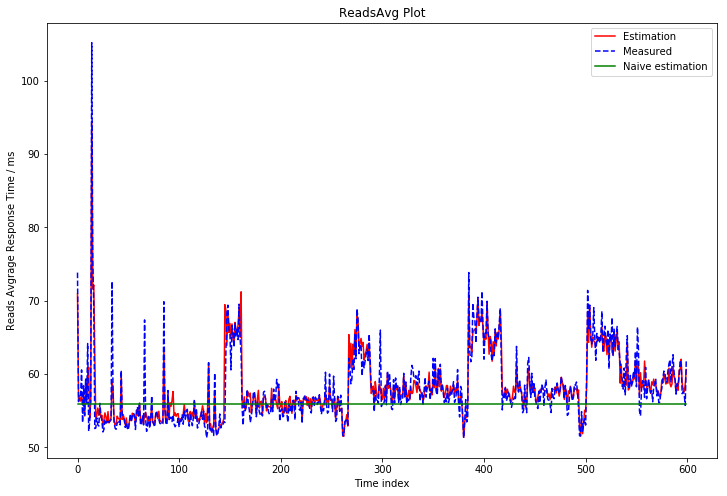

In [139]:
figure(figsize=(12, 8))
plt.plot(timeStamp, newPredNNY.T[0], color='r', label = "Estimation")
plt.plot(timeStamp, newNumpyY.T[0], color='b', linestyle='dashed', label = "Measured")
plt.plot(timeStamp, newPredNaiveY.T[0], color='g', label = "Naive estimation")
plt.xlabel('Time index')
plt.ylabel('Reads Avgrage Response Time / ms')
plt.legend()
plt.title('ReadsAvg Plot')
plt.show()

##### Plot of Key Value 2

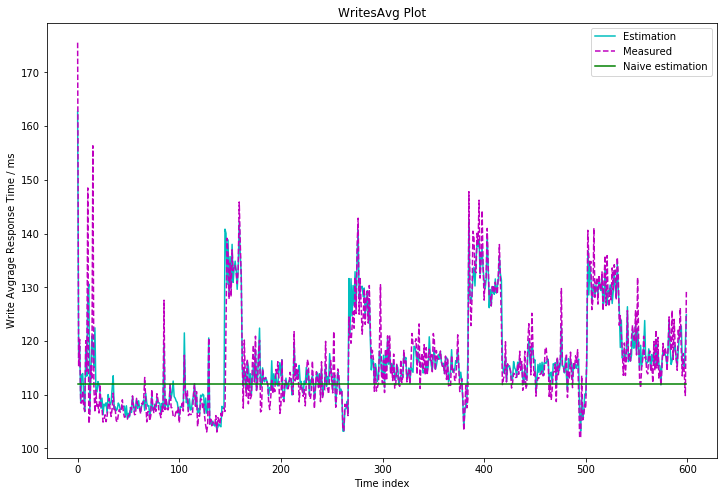

In [140]:
figure(figsize=(12, 8))
plt.plot(timeStamp, newPredNNY.T[1], color='c', label = "Estimation")
plt.plot(timeStamp, newNumpyY.T[1], color='m', linestyle='dashed', label = "Measured")
plt.plot(timeStamp, newPredNaiveY.T[1], color='g', label = "Naive estimation")
plt.xlabel('Time index')
plt.ylabel('Write Avgrage Response Time / ms')
plt.legend()
plt.title('WritesAvg Plot')
plt.show()

##### Density Plot of Target Test Values

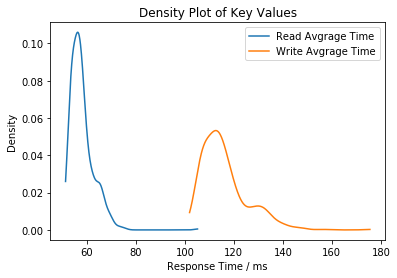

In [146]:
density1 = gaussian_kde(newNumpyY.T[0])
density2 = gaussian_kde(newNumpyY.T[1])
scaleX1 = np.linspace(np.min(newNumpyY.T[0]), np.max(newNumpyY.T[0]), 600)
scaleX2 = np.linspace(np.min(newNumpyY.T[1]), np.max(newNumpyY.T[1]), 600)
plt.plot(scaleX1, density1(scaleX1), label = 'Read Avgrage Time')
plt.plot(scaleX2, density2(scaleX2), label = 'Write Avgrage Time')
plt.xlabel('Response Time / ms')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of Key Values')
plt.show()

##### Histogram

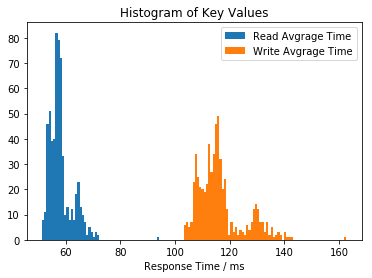

In [143]:
plt.hist(newPredNNY.T[0], bins=int(np.max(newNumpyY.T[0])-np.min(newNumpyY.T[0])), label = 'Read Avgrage Time')
plt.hist(newPredNNY.T[1], bins=int(np.max(newNumpyY.T[1])-np.min(newNumpyY.T[1])), label = 'Write Avgrage Time')
plt.xlabel('Response Time / ms')
plt.legend()
plt.title('Histogram of Key Values')
plt.show()

##### Density Plot of Estimation Errors 

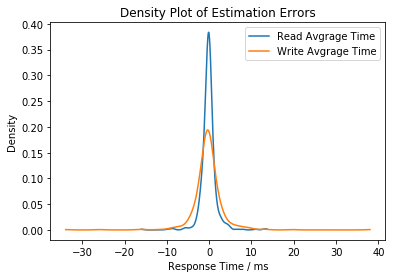

In [147]:
error1 = newNumpyY.T[0] - newPredNNY.T[0]
error2 = newNumpyY.T[1] - newPredNNY.T[1]
density1 = gaussian_kde(error1)
density2 = gaussian_kde(error2)
scaleX1 = np.linspace(np.min(error1), np.max(error1), 600)
scaleX2 = np.linspace(np.min(error2), np.max(error2), 600)
plt.plot(scaleX1, density1(scaleX1), label = 'Read Avgrage Time')
plt.plot(scaleX2, density2(scaleX2), label = 'Write Avgrage Time')
plt.xlabel('Response Time / ms')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plot of Estimation Errors')
plt.show()